## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import pickle
import warnings
warnings.filterwarnings('ignore')

# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Sklearn Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Download NLTK data
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [7]:
# Download additional NLTK data
import nltk
nltk.download('punkt_tab')
print("✅ NLTK punkt_tab downloaded!")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Miftah\AppData\Roaming\nltk_data...


✅ NLTK punkt_tab downloaded!


[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


## 2. Load Dataset

In [2]:
# Load data
df = pd.read_csv('../data/spam.csv')

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset shape: (105, 2)

First 5 rows:


,text,label
0,Congratulations! You've won a $1000 gift card....,spam
1,"Hey, are we still meeting for lunch tomorrow?",ham
2,URGENT: Your account has been compromised. Ver...,spam
3,Can you send me the project files?,ham
4,Free entry in 2 a wkly comp to win FA Cup fina...,spam


In [3]:
# Check dataset info
print("Dataset Info:")
df.info()
print("\nMissing values:")
print(df.isnull().sum())
print("\nLabel distribution:")
print(df['label'].value_counts())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    105 non-null    object
 1   label   105 non-null    object
dtypes: object(2)
memory usage: 1.8+ KB

Missing values:
text     0
label    0
dtype: int64

Label distribution:
label
ham     53
spam    52
Name: count, dtype: int64


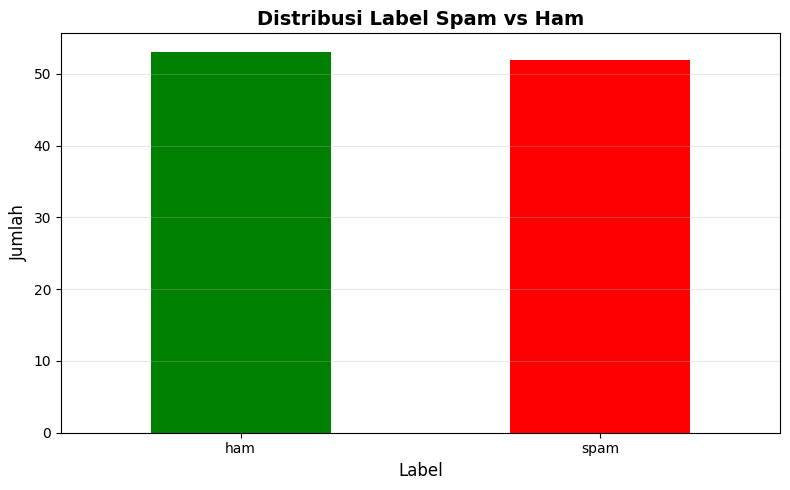

In [4]:
# Visualize label distribution
plt.figure(figsize=(8, 5))
df['label'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribusi Label Spam vs Ham', fontsize=14, fontweight='bold')
plt.xlabel('Label', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 3. Text Preprocessing

In [8]:
def preprocess_text(text):
    """
    Fungsi untuk preprocessing teks:
    1. Lowercase
    2. Remove punctuation
    3. Remove stopwords
    """
    # Lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Join tokens back to string
    return ' '.join(tokens)

# Test preprocessing function
sample_text = "Hello! This is a TEST message with punctuation."
print("Original:", sample_text)
print("Preprocessed:", preprocess_text(sample_text))

Original: Hello! This is a TEST message with punctuation.
Preprocessed: hello test message punctuation


In [9]:
# Apply preprocessing to all texts
print("Preprocessing semua teks...")
df['cleaned_text'] = df['text'].apply(preprocess_text)

print("\n✅ Preprocessing selesai!")
print("\nContoh hasil preprocessing:")
for i in range(3):
    print(f"\n--- Sample {i+1} ---")
    print(f"Original: {df['text'].iloc[i]}")
    print(f"Cleaned: {df['cleaned_text'].iloc[i]}")
    print(f"Label: {df['label'].iloc[i]}")

Preprocessing semua teks...

✅ Preprocessing selesai!

Contoh hasil preprocessing:

--- Sample 1 ---
Original: Congratulations! You've won a $1000 gift card. Click here to claim now!
Cleaned: congratulations youve 1000 gift card click claim
Label: spam

--- Sample 2 ---
Original: Hey, are we still meeting for lunch tomorrow?
Cleaned: hey still meeting lunch tomorrow
Label: ham

--- Sample 3 ---
Original: URGENT: Your account has been compromised. Verify your identity immediately!
Cleaned: urgent account compromised verify identity immediately
Label: spam


## 4. Feature Extraction dengan TF-IDF

In [10]:
# Split data into train and test sets
X = df['cleaned_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("\nLabel distribution in training set:")
print(y_train.value_counts())
print("\nLabel distribution in test set:")
print(y_test.value_counts())

Training set size: 84
Test set size: 21

Label distribution in training set:
label
ham     42
spam    42
Name: count, dtype: int64

Label distribution in test set:
label
ham     11
spam    10
Name: count, dtype: int64


In [11]:
# Create TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1, 2))

# Fit and transform training data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF features shape (train):", X_train_tfidf.shape)
print("TF-IDF features shape (test):", X_test_tfidf.shape)
print(f"\n✅ TF-IDF vectorization selesai dengan {X_train_tfidf.shape[1]} features!")

TF-IDF features shape (train): (84, 608)
TF-IDF features shape (test): (21, 608)

✅ TF-IDF vectorization selesai dengan 608 features!


## 5. Model Training

In [12]:
# Dictionary untuk menyimpan model dan hasil evaluasi
models = {}
results = {}

### 5.1 Logistic Regression

In [13]:
# Train Logistic Regression
print("Training Logistic Regression...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_tfidf)

# Store model
models['Logistic Regression'] = lr_model

print("✅ Logistic Regression training selesai!")

Training Logistic Regression...
✅ Logistic Regression training selesai!


### 5.2 Naive Bayes

In [14]:
# Train Naive Bayes
print("Training Naive Bayes...")
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test_tfidf)

# Store model
models['Naive Bayes'] = nb_model

print("✅ Naive Bayes training selesai!")

Training Naive Bayes...
✅ Naive Bayes training selesai!


## 6. Model Evaluation

In [15]:
def evaluate_model(y_true, y_pred, model_name):
    """
    Fungsi untuk evaluasi model
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label='spam')
    recall = recall_score(y_true, y_pred, pos_label='spam')
    f1 = f1_score(y_true, y_pred, pos_label='spam')
    
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    
    print(f"\n{'='*50}")
    print(f"📊 {model_name} - Evaluation Results")
    print(f"{'='*50}")
    print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
    print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
    print(f"F1-Score:  {f1:.4f} ({f1*100:.2f}%)")
    print(f"{'='*50}")
    
    return accuracy, precision, recall, f1

In [16]:
# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_lr, 'Logistic Regression')


📊 Logistic Regression - Evaluation Results
Accuracy:  0.8095 (80.95%)
Precision: 0.7500 (75.00%)
Recall:    0.9000 (90.00%)
F1-Score:  0.8182 (81.82%)


(0.8095238095238095, 0.75, 0.9, 0.8181818181818182)

In [17]:
# Evaluate Naive Bayes
evaluate_model(y_test, y_pred_nb, 'Naive Bayes')


📊 Naive Bayes - Evaluation Results
Accuracy:  0.8095 (80.95%)
Precision: 0.7500 (75.00%)
Recall:    0.9000 (90.00%)
F1-Score:  0.8182 (81.82%)


(0.8095238095238095, 0.75, 0.9, 0.8181818181818182)

## 7. Model Comparison

In [18]:
# Create comparison dataframe
comparison_df = pd.DataFrame(results).T
print("\n📈 Model Comparison:")
print(comparison_df)

# Select best model based on F1-Score
best_model_name = comparison_df['F1-Score'].idxmax()
best_model = models[best_model_name]

print(f"\n🏆 Best Model: {best_model_name}")
print(f"F1-Score: {comparison_df.loc[best_model_name, 'F1-Score']:.4f}")


📈 Model Comparison:
                     Accuracy  Precision  Recall  F1-Score
Logistic Regression  0.809524       0.75     0.9  0.818182
Naive Bayes          0.809524       0.75     0.9  0.818182

🏆 Best Model: Logistic Regression
F1-Score: 0.8182


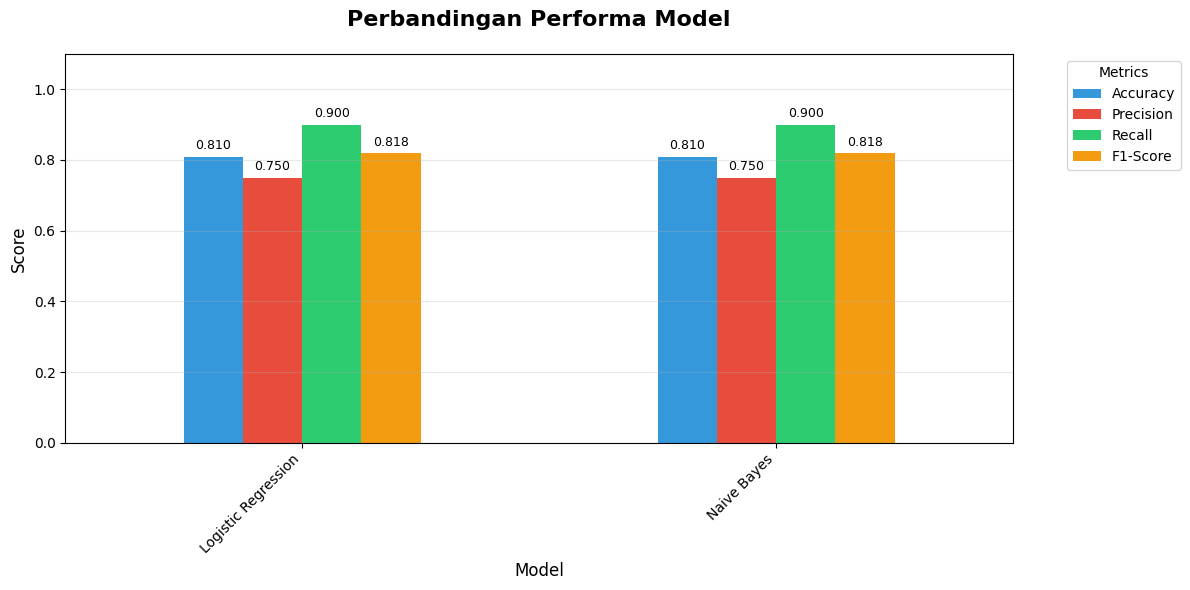

In [19]:
# Visualize comparison
fig, ax = plt.subplots(figsize=(12, 6))

comparison_df.plot(kind='bar', ax=ax, color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'])
plt.title('Perbandingan Performa Model', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, 1.1)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=9)

plt.tight_layout()
plt.show()

## 8. Confusion Matrix

In [20]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    """
    Fungsi untuk visualisasi confusion matrix
    """
    cm = confusion_matrix(y_true, y_pred, labels=['ham', 'spam'])
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Ham', 'Spam'], 
                yticklabels=['Ham', 'Spam'],
                cbar_kws={'label': 'Count'})
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14, fontweight='bold', pad=20)
    plt.ylabel('Actual', fontsize=12)
    plt.xlabel('Predicted', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    return cm

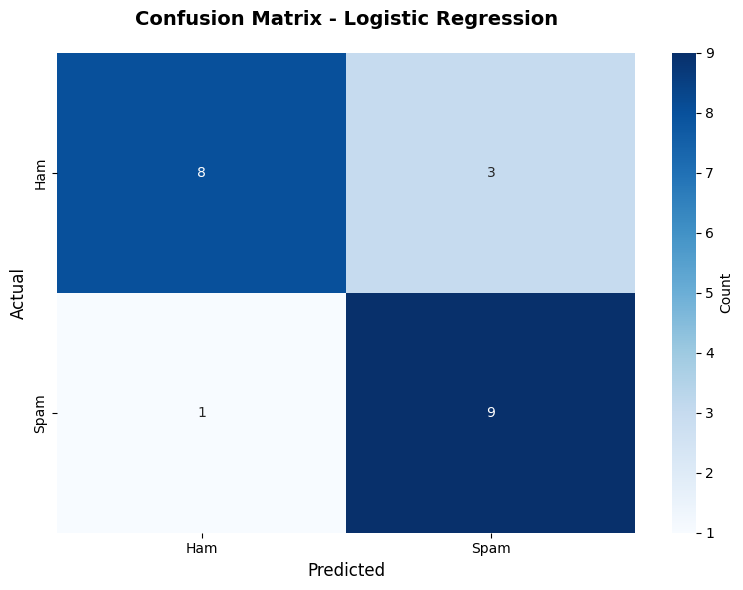

In [21]:
# Plot confusion matrix for Logistic Regression
cm_lr = plot_confusion_matrix(y_test, y_pred_lr, 'Logistic Regression')

In [ ]:
# Plot confusion matrix for Naive Bayes
cm_nb = plot_confusion_matrix(y_test, y_pred_nb, 'Naive Bayes')

## 9. Classification Report

In [22]:
# Classification report for best model
if best_model_name == 'Logistic Regression':
    y_pred_best = y_pred_lr
else:
    y_pred_best = y_pred_nb

print(f"\n📋 Classification Report - {best_model_name}:")
print(classification_report(y_test, y_pred_best, target_names=['Ham', 'Spam']))


📋 Classification Report - Logistic Regression:
              precision    recall  f1-score   support

         Ham       0.89      0.73      0.80        11
        Spam       0.75      0.90      0.82        10

    accuracy                           0.81        21
   macro avg       0.82      0.81      0.81        21
weighted avg       0.82      0.81      0.81        21



## 10. Save Model

In [23]:
# Save best model
with open('../model/model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print(f"✅ Model saved: ../model/model.pkl ({best_model_name})")

✅ Model saved: ../model/model.pkl (Logistic Regression)


In [24]:
# Save TF-IDF vectorizer
with open('../model/tfidf.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

print("✅ TF-IDF vectorizer saved: ../model/tfidf.pkl")

✅ TF-IDF vectorizer saved: ../model/tfidf.pkl


## 11. Test Prediction Function

In [25]:
def predict_spam(text, model, vectorizer):
    """
    Fungsi untuk prediksi spam
    """
    # Preprocess
    cleaned = preprocess_text(text)
    
    # Vectorize
    vectorized = vectorizer.transform([cleaned])
    
    # Predict
    prediction = model.predict(vectorized)[0]
    probability = model.predict_proba(vectorized)[0]
    
    return prediction, probability

# Test predictions
test_messages = [
    "Congratulations! You won $1000. Click here now!",
    "Hey, want to grab lunch tomorrow?",
    "URGENT: Your account needs verification immediately!",
    "Can you send me the meeting notes?"
]

print("\n🧪 Testing predictions:\n")
for msg in test_messages:
    pred, prob = predict_spam(msg, best_model, tfidf)
    spam_prob = prob[1] if pred == 'spam' else prob[0]
    print(f"Message: {msg}")
    print(f"Prediction: {pred.upper()} (confidence: {spam_prob*100:.2f}%)")
    print("-" * 80)


🧪 Testing predictions:

Message: Congratulations! You won $1000. Click here now!
Prediction: SPAM (confidence: 62.75%)
--------------------------------------------------------------------------------
Message: Hey, want to grab lunch tomorrow?
Prediction: HAM (confidence: 58.97%)
--------------------------------------------------------------------------------
Message: URGENT: Your account needs verification immediately!
Prediction: SPAM (confidence: 60.80%)
--------------------------------------------------------------------------------
Message: Can you send me the meeting notes?
Prediction: HAM (confidence: 65.49%)
--------------------------------------------------------------------------------


## 12. Summary

In [26]:
print("\n" + "="*60)
print("🎉 TRAINING COMPLETED SUCCESSFULLY!")
print("="*60)
print(f"\n📊 Dataset: {df.shape[0]} samples")
print(f"📚 Training samples: {X_train.shape[0]}")
print(f"🧪 Test samples: {X_test.shape[0]}")
print(f"\n🏆 Best Model: {best_model_name}")
print(f"📈 Accuracy: {comparison_df.loc[best_model_name, 'Accuracy']:.4f}")
print(f"📈 F1-Score: {comparison_df.loc[best_model_name, 'F1-Score']:.4f}")
print(f"\n💾 Saved files:")
print(f"   - ../model/model.pkl")
print(f"   - ../model/tfidf.pkl")
print("\n✨ Model is ready to use in the Streamlit app!")
print("="*60)


🎉 TRAINING COMPLETED SUCCESSFULLY!

📊 Dataset: 105 samples
📚 Training samples: 84
🧪 Test samples: 21

🏆 Best Model: Logistic Regression
📈 Accuracy: 0.8095
📈 F1-Score: 0.8182

💾 Saved files:
   - ../model/model.pkl
   - ../model/tfidf.pkl

✨ Model is ready to use in the Streamlit app!
